In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests 
#import requests as r
import matplotlib.pyplot as plt

from unicodedata import normalize
from sklearn import utils
from IPython.display import display_html
from matplotlib import pyplot as plt                        
from bs4 import BeautifulSoup
from sklearn import preprocessing, linear_model, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
# specify url
url = 'https://www.worldometers.info/coronavirus/'

# request html
page = requests.get(url)

# Parse html using BeautifulSoup, you can use a different parser like lxml if present
soup = BeautifulSoup(page.content, 'html.parser')

table =soup.find("table",{"id":"main_table_countries_today"})

In [3]:
display_html(url, raw=True)

https://www.worldometers.info/coronavirus/

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')

table =soup.find("table",{"id":"main_table_countries_today"})
country = list()
total_cases = list()
num = list()
population=list()
table_body=soup.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    #print (cols[2])
    country.append(cols[1])
    total_cases.append(cols[2])
    num.append(cols[4]) 
    population.append(cols[14])

df = pd.DataFrame(country)
df[1] = pd.DataFrame(total_cases)
df[2] = pd.DataFrame(num)
df[3]=pd.DataFrame(population)

df=pd.DataFrame({"country":country,"total_cases":total_cases,"total_deths":num,"population":population})
df.head(20)

,country,total_cases,total_deths,population
0,North America,"40,394,451","913,280",
1,Asia,"54,790,963","773,287",
2,South America,"31,881,059","977,893",
3,Europe,"47,568,537","1,095,174",
4,Africa,"5,301,071","139,044",
5,Oceania,"72,039","1,268",
6,,721,15,
7,World,"180,008,841","3,899,961",
8,USA,"34,434,803","617,875","332,891,997"
9,India,"30,028,709","390,691","1,393,197,894"


In [5]:
df_org = df.copy()

In [6]:
#tables from wiki 
table_2021 = pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory#Monthly_cumulative_covid-19_death_totals_by_country_2021', match='Cumulative COVID-19 deaths at the start of each month')
table_2020 = pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory#Monthly_cumulative_covid-19_death_totals_by_country_2021', match='Cumulative COVID-19 deaths on Jan 11, and first day of following months')

In [7]:
df_2021 = table_2021[0]
df_2020 = table_2020[0]

In [8]:
df_2020

,2020,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,1.0,259.0,2977.0,40598.0,224172.0,371166.0,508055.0,675060.0,848445.0,1010639.0,1192911.0,1465144.0
2,Days to double,6.0,4.0,16.0,8.0,18.0,37.0,56.0,70.0,80.0,94.0,101.0,110.0
3,Countries and territories,1.0,1.0,8.0,125.0,175.0,185.0,186.0,192.0,191.0,193.0,193.0,193.0
4,USA,0.0,0.0,0.0,2850.0,55337.0,102640.0,126573.0,151265.0,182162.0,204642.0,228185.0,264808.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Fiji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
197,Saint Lucia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
198,British Virgin Islands,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
199,Burundi,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
df_2021

,2021,First death,Jan 1,Feb 1,Mar 1,Apr 1,May 1,Jun 1
0,World,NaN,1472363,1786759,2021136,2262948,2603854,3663570
1,Days to double,NaN,112,105,113,130,143,154
2,Countries and territories,NaN,196,202,202,205,206,209
3,USA,"March 3, 2020",335789,436051,508584,545887,569722,588756
4,Brazil,"March 19, 2020",193875,223945,254221,317646,401186,461931
...,...,...,...,...,...,...,...,...
207,Montserrat,"April 26, 2020",1,1,1,1,1,1
208,Grenada,"January 4, 2021",0,1,1,1,1,1
209,Faroe Islands,"January 7, 2021",0,1,1,1,1,1
210,Bhutan,"January 9, 2021",0,1,1,1,1,1


In [10]:
#merge data from diffrent tables
new=list()
for index in df_2021['2021']:
    new.append(df_org[df_org['country'] == index]['population'].values)
df_2021['population']=pd.DataFrame(new)
df_2021 = df_2021[["2021", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]
new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Jan'].values)
df_2021['Jan']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Feb'].values)
df_2021['Feb']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Mar'].values)
df_2021['Mar']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Apr'].values)
df_2021['Apr']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['May'].values)
df_2021['May']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Jun'].values)
df_2021['Jun']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Jul'].values)
df_2021['Jul']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun","Jul", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Aug'].values)
df_2021['Aug']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Sep'].values)
df_2021['Sep']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Oct'].values)
df_2021['Oct']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Nov'].values)
df_2021['Nov']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]

new=list()
for index in df_2021['2021']:
    new.append(df_2020[df_2020['2020'] == index]['Dec'].values)
df_2021['Dec']=pd.DataFrame(new)
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec", "First death", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","population"]]


In [11]:
df_2021

,2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Nov,Dec,First death,Jan 1,Feb 1,Mar 1,Apr 1,May 1,Jun 1,population
0,World,1.0,259.0,2977.0,40598.0,224172.0,371166.0,508055.0,675060.0,848445.0,...,1192911.0,1465144.0,NaN,1472363,1786759,2021136,2262948,2603854,3663570,
1,Days to double,6.0,4.0,16.0,8.0,18.0,37.0,56.0,70.0,80.0,...,101.0,110.0,NaN,112,105,113,130,143,154,None
2,Countries and territories,1.0,1.0,8.0,125.0,175.0,185.0,186.0,192.0,191.0,...,193.0,193.0,NaN,196,202,202,205,206,209,None
3,USA,0.0,0.0,0.0,2850.0,55337.0,102640.0,126573.0,151265.0,182162.0,...,228185.0,264808.0,"March 3, 2020",335789,436051,508584,545887,569722,588756,"332,891,997"
4,Brazil,0.0,0.0,0.0,159.0,5466.0,28834.0,58314.0,91263.0,120828.0,...,159477.0,172833.0,"March 19, 2020",193875,223945,254221,317646,401186,461931,"214,029,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Montserrat,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,"April 26, 2020",1,1,1,1,1,1,"4,995"
208,Grenada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"January 4, 2021",0,1,1,1,1,1,"113,031"
209,Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"January 7, 2021",0,1,1,1,1,1,None
210,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"January 9, 2021",0,1,1,1,1,1,"779,868"


In [12]:
df_2021["last-first"]= (df_2021["Jun 1"]-df_2021["May 1"])
df_2021["divide"]=df_2021["last-first"]/18

In [13]:
df_2021.replace('', np.nan)
for i in range(1,211):
    if df_2021['population'][i] == None:
        continue
    else:
        df_2021['population'][i]=df_2021['population'][i].replace(',', '')

<ipython-input-13-c67247a1c977>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['population'][i]=df_2021['population'][i].replace(',', '')


In [14]:
df_2021['population'] = pd.to_numeric(df_2021['population'])
from numpy import int64
df_2021['population'] = df_2021['population'].fillna(0)
df_2021['population']=df_2021['population'].astype(int64)

In [15]:
df_2021.drop([0,1,2],axis=0,inplace=True)

In [16]:
df_2021['The Increase %'] = (df_2021["last-first"]/df_2021['population'])*100

In [17]:
df_2021 = df_2021[["2021","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec", "First death",  "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","last-first","population","divide","The Increase %"]]

<AxesSubplot:xlabel='2021'>

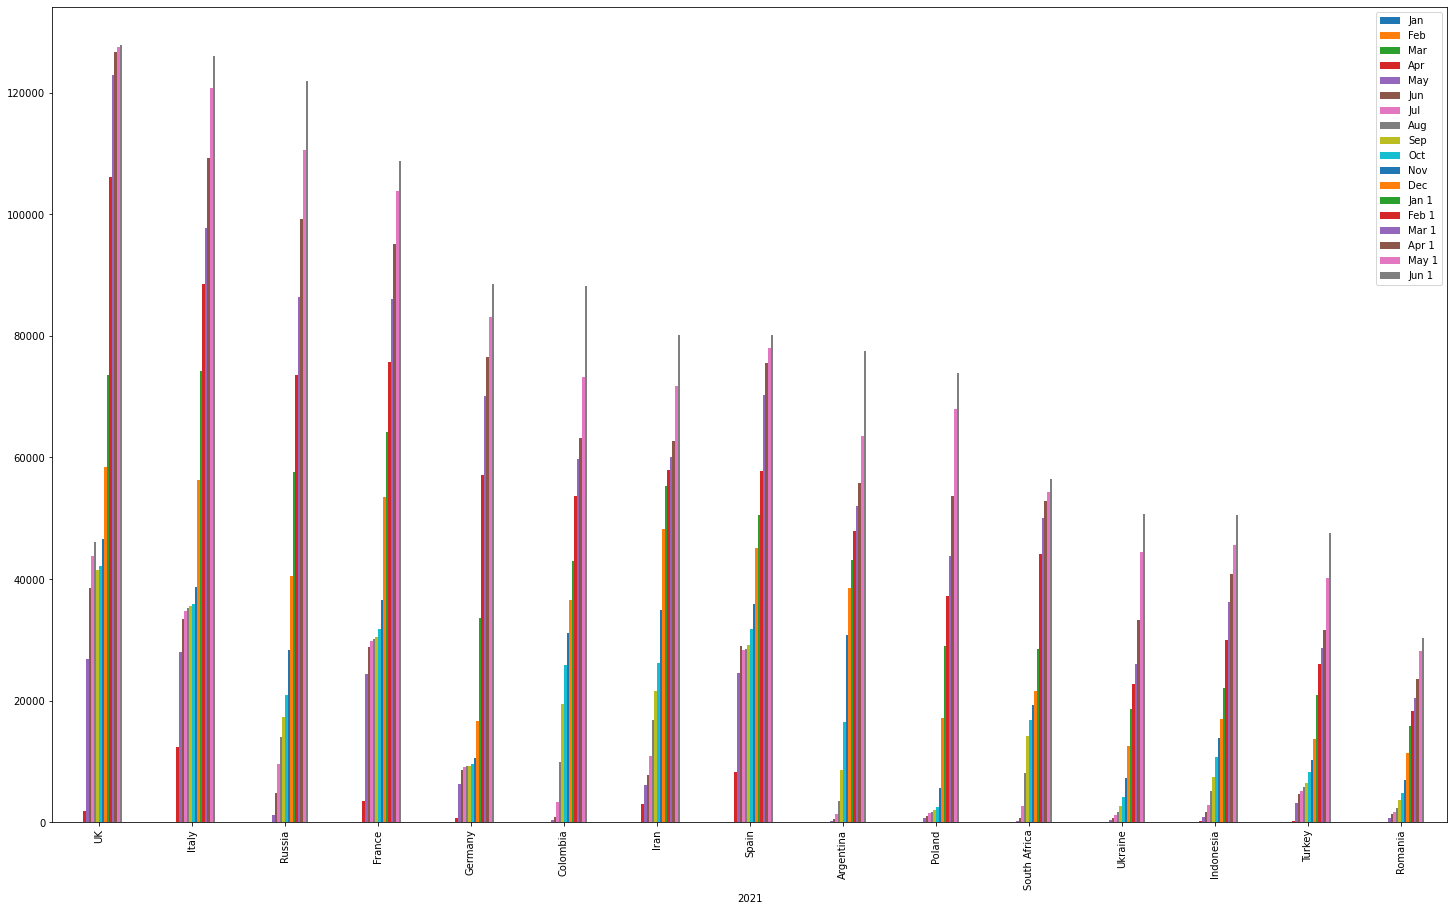

In [18]:
df_copy=df_2021[5:20]
df_copy.plot('2021',["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec", "Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1"],kind = 'bar',figsize=(25,15))

In [19]:
df_copy_top_5=df_2021.copy()
top_5 = df_copy_top_5.sort_values(by="The Increase %", ascending=False).head(10)

In [20]:
top_5.head(10)

,2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Jan 1,Feb 1,Mar 1,Apr 1,May 1,Jun 1,last-first,population,divide,The Increase %
142,Reunion,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,5.0,...,42,46,52,115,148,189,41,0,2.277778,inf
156,Guam,0.0,0.0,0.0,2.0,5.0,5.0,5.0,5.0,10.0,...,122,129,131,134,136,139,3,0,0.166667,inf
88,Kosovo,0.0,0.0,0.0,1.0,22.0,30.0,41.0,217.0,515.0,...,1325,1488,1589,1862,2163,2233,70,0,3.888889,inf
192,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,3,4,10,16,17,1,0,0.055556,inf
83,Puerto Rico,0.0,0.0,0.0,8.0,54.0,136.0,153.0,219.0,434.0,...,1503,1829,2036,2113,2303,2502,199,0,11.055556,inf
165,Central African Republic,0.0,0.0,0.0,0.0,0.0,2.0,47.0,59.0,62.0,...,63,63,63,72,88,98,10,0,0.555556,inf
134,Cote d'Ivoire,0.0,0.0,0.0,0.0,14.0,33.0,66.0,102.0,115.0,...,137,154,192,244,286,305,19,0,1.055556,inf
198,Saint Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,8,10,11,12,1,0,0.055556,inf
180,São Tomé and Príncipe,0.0,0.0,0.0,0.0,1.0,10.0,11.0,15.0,15.0,...,17,17,29,34,35,37,2,0,0.111111,inf
90,South Korea,0.0,0.0,18.0,165.0,248.0,271.0,282.0,301.0,324.0,...,917,1425,1605,1735,1831,1963,132,0,7.333333,inf


In [21]:
df_2021=df_2021.dropna()

In [22]:
df_2021["Feb 20 - Jan 20"]= (df_2021["Feb"]-df_2021["Jan"])/df_2021['population']
df_2021["Mar 20 - Feb 20"]= (df_2021["Mar"]-df_2021["Feb"])/df_2021['population']
df_2021["Apr 20 - Mar 20"]= (df_2021["Apr"]-df_2021["Mar"])/df_2021['population']
df_2021["May 20 - Apr 20"]= (df_2021["May"]-df_2021["Apr"])/df_2021['population']
df_2021["Jun 20 - May 20"]= (df_2021["Jun"]-df_2021["May"])/df_2021['population']
df_2021["Jul 20 - Jun 20"]= (df_2021["Jul"]-df_2021["Jun"])/df_2021['population']
df_2021["Aug 20 - Jul 20"]= (df_2021["Aug"]-df_2021["Jul"])/df_2021['population']
df_2021["Sep 20 - Aug 20"]= (df_2021["Sep"]-df_2021["Aug"])/df_2021['population']
df_2021["Oct 20 - Sep 20"]= (df_2021["Oct"]-df_2021["Sep"])/df_2021['population']
df_2021["Nov 20 - Oct 20"]= (df_2021["Nov"]-df_2021["Oct"])/df_2021['population']
df_2021["Dec 20 - Nov 20"]= (df_2021["Dec"]-df_2021["Nov"])/df_2021['population']
df_2021["Jan 21 - Dec 20"]= (df_2021["Jan 1"]-df_2021["Dec"])/df_2021['population']
df_2021["Feb 21 - Jan 21"]= (df_2021["Feb 1"]-df_2021["Jan 1"])/df_2021['population']
df_2021["Mar 21 - Feb 21"]= (df_2021["Mar 1"]-df_2021["Feb 1"])/df_2021['population']
df_2021["Apr 21 - Mar 21"]= (df_2021["Apr 1"]-df_2021["Mar 1"])/df_2021['population']
df_2021["May 21 - Apr 21"]= (df_2021["May 1"]-df_2021["Apr 1"])/df_2021['population']
df_2021["Jun 21 - May 21"]= (df_2021["Jun 1"]-df_2021["May 1"])/df_2021['population']

column_names = ["2021", "First death","Feb 20 - Jan 20","Mar 20 - Feb 20","Apr 20 - Mar 20","May 20 - Apr 20","Jun 20 - May 20","Jul 20 - Jun 20","Aug 20 - Jul 20","Sep 20 - Aug 20","Oct 20 - Sep 20","Nov 20 - Oct 20","Dec 20 - Nov 20","Jan 21 - Dec 20","Feb 21 - Jan 21","Mar 21 - Feb 21","Apr 21 - Mar 21","May 21 - Apr 21","Jun 21 - May 21"]
df = df_2021.reindex(columns=column_names)
df_org = df.copy()


In [23]:
df_org.drop('Feb 20 - Jan 20',axis=1, inplace=True)
df_org.drop('Mar 20 - Feb 20',axis=1, inplace=True)
df_org.drop('Apr 20 - Mar 20',axis=1, inplace=True)

In [24]:
df_org = df_org.replace([np.inf, -np.inf], 0)
df_org = df_org.replace([np.nan], 0)

In [25]:
df_org

,2021,First death,May 20 - Apr 20,Jun 20 - May 20,Jul 20 - Jun 20,Aug 20 - Jul 20,Sep 20 - Aug 20,Oct 20 - Sep 20,Nov 20 - Oct 20,Dec 20 - Nov 20,Jan 21 - Dec 20,Feb 21 - Jan 21,Mar 21 - Feb 21,Apr 21 - Mar 21,May 21 - Apr 21,Jun 21 - May 21
3,USA,"March 3, 2020",1.576698e-04,0.000142,0.000072,0.000074,0.000093,0.000068,0.000071,0.000110,0.000213,0.000301,0.000218,0.000112,0.000072,0.000057
4,Brazil,"March 19, 2020",2.479562e-05,0.000109,0.000138,0.000154,0.000138,0.000103,0.000077,0.000062,0.000098,0.000140,0.000141,0.000296,0.000390,0.000284
5,India,"March 13, 2020",7.960104e-07,0.000003,0.000009,0.000014,0.000021,0.000024,0.000017,0.000011,0.000008,0.000004,0.000002,0.000004,0.000035,0.000086
6,Mexico,"March 20, 2020",1.308255e-05,0.000062,0.000133,0.000145,0.000139,0.000100,0.000108,0.000110,0.000148,0.000255,0.000209,0.000133,0.000106,0.000054
7,Peru,"March 21, 2020",2.750015e-05,0.000103,0.000154,0.000285,0.000292,0.000108,0.000060,0.000045,0.000051,0.000097,0.000163,0.000165,0.000278,0.003674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Fiji,"August 1, 2020",0.000000e+00,0.000000,0.000000,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002
202,Brunei,"March 28, 2020",0.000000e+00,0.000002,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
204,Cayman Islands,"March 16, 2020",0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
206,British Virgin Islands,"April 20, 2020",3.286555e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


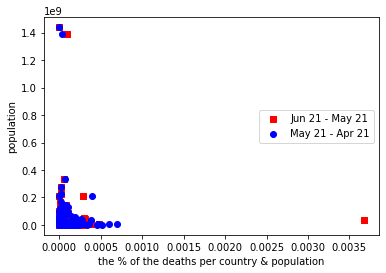

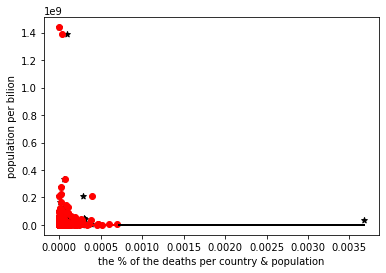

In [26]:
plt.scatter(x=df_org['Jun 21 - May 21'],y=df_2021['population'],c='r',marker='s',label='Jun 21 - May 21')
plt.scatter(x=df_org['May 21 - Apr 21'],y=df_2021['population'],c='b',marker='o',label='May 21 - Apr 21')

plt.legend(numpoints=100,loc=7)
plt.xlabel('the % of the deaths per country & population')
plt.ylabel('population')
plt.show()

m=linear_model.LinearRegression().fit(df_org.iloc[:,15:16],df_org.iloc[:,3:15])
plt.scatter(x=df_org['Jun 21 - May 21'],y=df_2021['population'],c='k',marker='*',label='Digital')
plt.scatter(x=df_org['May 21 - Apr 21'],y=df_2021['population'],c='r',marker='o',label='Digital')

plt.plot(df_org['Jun 21 - May 21'],m.predict(df_org.iloc[:,14:15].values.reshape(df_org['Jun 21 - May 21'].shape[0],1)),c='k',linewidth=2)
plt.plot(df_org['May 21 - Apr 21'],m.predict(df_org.iloc[:,13:14].values.reshape(df_org['May 21 - Apr 21'].shape[0],1)),c='r',linewidth=2)

plt.xlabel('the % of the deaths per country & population')
plt.ylabel('population per bilion')
plt.show()

,2021,First death,May 20 - Apr 20,Jun 20 - May 20,Jul 20 - Jun 20,Aug 20 - Jul 20,Sep 20 - Aug 20,Oct 20 - Sep 20,Nov 20 - Oct 20,Dec 20 - Nov 20,Jan 21 - Dec 20,Feb 21 - Jan 21,Mar 21 - Feb 21,Apr 21 - Mar 21,May 21 - Apr 21,Jun 21 - May 21
7,Peru,"March 21, 2020",2.750015e-05,1.025795e-04,1.535999e-04,0.000285,0.000292,0.000108,0.000060,0.000045,0.000051,0.000097,0.000163,0.000165,0.000278,36.740081
68,Uruguay,"April 1, 2020",4.016692e-06,2.008346e-06,1.434533e-06,0.000002,0.000003,0.000001,0.000003,0.000005,0.000028,0.000074,0.000049,0.000100,0.000462,4.733959
48,Paraguay,"March 22, 2020",8.312920e-07,2.770973e-07,8.312920e-07,0.000004,0.000036,0.000074,0.000076,0.000049,0.000069,0.000064,0.000064,0.000138,0.000297,3.853039


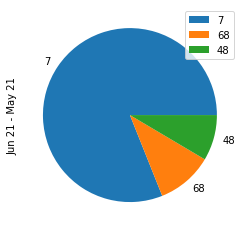

In [27]:
df_copy_top_3=df_org.copy()

df_copy_top_3['Jun 21 - May 21'] = df_copy_top_3["Jun 21 - May 21"]*10000

top_3 = df_copy_top_3.sort_values(by="Jun 21 - May 21", ascending=False).head(3)
top_3.plot(x="2021", y="Jun 21 - May 21", kind="pie", rot=200, fontsize=10)
top_3.head(3)

,2021,First death,May 20 - Apr 20,Jun 20 - May 20,Jul 20 - Jun 20,Aug 20 - Jul 20,Sep 20 - Aug 20,Oct 20 - Sep 20,Nov 20 - Oct 20,Dec 20 - Nov 20,Jan 21 - Dec 20,Feb 21 - Jan 21,Mar 21 - Feb 21,Apr 21 - Mar 21,May 21 - Apr 21,Jun 21 - May 21
7,Peru,"March 21, 2020",2.750015e-05,1.025795e-04,1.535999e-04,0.000285,0.000292,0.000108,0.000060,0.000045,0.000051,0.000097,0.000163,0.000165,0.000278,0.003674
68,Uruguay,"April 1, 2020",4.016692e-06,2.008346e-06,1.434533e-06,0.000002,0.000003,0.000001,0.000003,0.000005,0.000028,0.000074,0.000049,0.000100,0.000462,0.000473
48,Paraguay,"March 22, 2020",8.312920e-07,2.770973e-07,8.312920e-07,0.000004,0.000036,0.000074,0.000076,0.000049,0.000069,0.000064,0.000064,0.000138,0.000297,0.000385


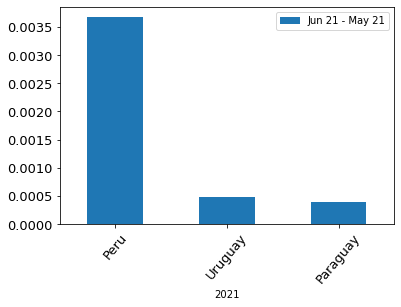

In [28]:
df_copy_top_3=df_org.copy()
top_3 = df_copy_top_3.sort_values(by="Jun 21 - May 21", ascending=False).head(3)
top_3.plot(x="2021", y="Jun 21 - May 21", kind="bar", rot=50, fontsize=13)
top_3.head(3)

In [29]:
label_column= "Jun 21 - May 21"
TRAINING_FEATURES = df_org.columns[df_org.columns != label_column]
TARGET_FEATURE = label_column

X = df_org[TRAINING_FEATURES]
y = df_org[TARGET_FEATURE]

In [30]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
X_train.drop('2021',axis=1, inplace=True)
X_train.drop('First death',axis=1, inplace=True)

C:\Users\denni\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
X_test.drop('2021',axis=1, inplace=True)
X_test.drop('First death',axis=1, inplace=True)

In [33]:
reg = linear_model.LinearRegression(fit_intercept=False)
trained_model=reg.fit(X_train, y_train)

In [34]:
a=trained_model.predict(X_test)

In [35]:
y_pred = pd.Series(a,index=X_test.index)

In [36]:
df1 = pd.DataFrame(data=y_pred.index, columns=['index'])
df2 = pd.DataFrame(data=y_pred.values, columns=['value'])
df_3 = pd.merge(df1, df2, left_index=True, right_index=True)

,index,value
30,7,0.000251
34,48,0.000194
26,66,0.000145


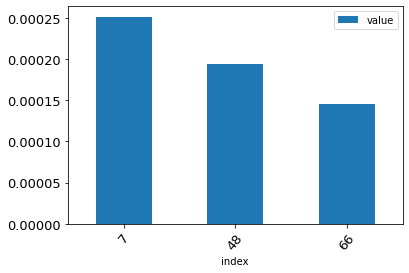

In [37]:
df_copy_top_3=df_3.copy()
df_copy_top_3.drop(index=[0], inplace=True)
top_3 = df_copy_top_3.sort_values(by="value", ascending=False).head(3)
top_3.plot(x="index", y="value", kind="bar", rot=50, fontsize=13)
top_3.head(3)